## SPRING 2021
## Applied Machine Learning
### Practicum 3: Logistic regression.

Download and pre-process the Iris flower data set by running the code cell below.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris_data=load_iris()
iris = pd.DataFrame(data=iris_data['data'], columns=[col[:-5] for col in iris_data['feature_names']])
iris['target']=iris_data['target']

In [2]:
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
#we are primarily interested in binary classification, we are only interested in a particular kind of iris.
#our iris to classify is virginica
#we essentially want to create a new target
y = (iris['target'].values ==2).astype(int) #2 means virginica

In [4]:
y.mean()

0.3333333333333333

In [5]:
cols = ['petal length', 'petal width']
x = iris.loc[:, cols].values

In [6]:
x.shape

(150, 2)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
#check percentage of positive class entries to make sure it worked
y_train.mean()
y_test.mean()

0.3333333333333333

In [9]:
#ready to build logistic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
v_int = log_reg.intercept_[0]
v_int

-15.454922834450192

In [11]:
#what about the weights after the interce[t
weights = log_reg.coef_[0]
weights

array([2.44812551, 2.02324314])

In [13]:
#logistic regression models a simple straight line as a classifier boundary
#classifier boundaries have probability values

y_pred = log_reg.predict(x_test)
acc = (y_test == y_pred).mean()
print(f"The accuracy of th emodel is {acc: .5f}.")

The accuracy of th emodel is  0.95556.


In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9555555555555556

In [16]:
y_dumb = np.zeros(len(y_test))

In [17]:
accuracy_score(y_test,y_dumb)

0.6666666666666666

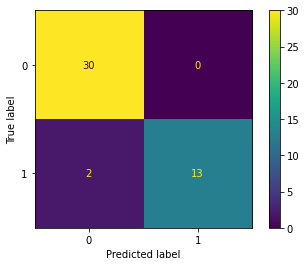

In [18]:
#Confusion matrix

#True negatives in the top left, true positives in bottom right, top right is false positives, in the bottom left is false negatives


from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(log_reg, x_test, y_test)
plt.show()

In [ ]:
#precision is True positives/ true positives + false positives